# 1. Read the file

In [1]:
import pandas as pd

# Using the raw GitHub content URL
url = "https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/DS2/Final%20Exam/Recipe%20Reviews%20and%20User%20Feedback%20Dataset.csv"

try:
    # Read the CSV file
    df = pd.read_csv(url)
    
    # Display basic information about the dataset
    print("Dataset shape:", df.shape)
    print("\nFirst few rows:")
    print(df.head())
    
    # Display basic information about the columns
    print("\nDataset info:")
    print(df.info())

except Exception as e:
    print(f"Error reading the file: {e}")
    print("Alternative: Please try downloading the file locally and use:")
    print('df = pd.read_csv("path_to_your_local_file.csv")')

Dataset shape: (18182, 15)

First few rows:
   Unnamed: 0  recipe_number  recipe_code         recipe_name  \
0           0              1        14299  Creamy White Chili   
1           1              1        14299  Creamy White Chili   
2           2              1        14299  Creamy White Chili   
3           3              1        14299  Creamy White Chili   
4           4              1        14299  Creamy White Chili   

                                        comment_id         user_id  \
0  sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM  u_9iFLIhMa8QaG   
1  sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY  u_Lu6p25tmE77j   
2  sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP  u_s0LwgpZ8Jsqq   
3  sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC  u_fqrybAdYjgjG   
4  sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI  u_XXWKwVhKZD69   

    user_name  user_reputation  created_at  reply_count  thumbs_up  \
0     Jeri326                1  1665619889            0          0   
1   

In [2]:
# Check missing values
missing_data = df.isnull().sum()

# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine count and percentage into a DataFrame
missing_analysis = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)

# Only show variables that have missing values
missing_analysis = missing_analysis[missing_analysis['Missing Count'] > 0]

print("Missing Data Analysis:")
print(missing_analysis)

# Additional insights about complete cases
print("\nTotal number of rows:", len(df))
print("Number of complete cases (rows with no missing data):", 
      len(df.dropna()))
print("Percentage of complete cases: {:.2f}%".format(
    (len(df.dropna()) / len(df)) * 100))

# Visual check of patterns in missing data (if there are any missing values)
if df.isnull().sum().sum() > 0:
    print("\nPattern of missing values in first few rows:")
    print(df.isnull().head(10))

Missing Data Analysis:
      Missing Count  Missing Percentage
text              2               0.011

Total number of rows: 18182
Number of complete cases (rows with no missing data): 18180
Percentage of complete cases: 99.99%

Pattern of missing values in first few rows:
   Unnamed: 0  recipe_number  recipe_code  recipe_name  comment_id  user_id  \
0       False          False        False        False       False    False   
1       False          False        False        False       False    False   
2       False          False        False        False       False    False   
3       False          False        False        False       False    False   
4       False          False        False        False       False    False   
5       False          False        False        False       False    False   
6       False          False        False        False       False    False   
7       False          False        False        False       False    False   
8       False 

In [3]:
# Show original dataset size
print("Original dataset shape:", df.shape)

# Drop rows with missing values
df = df.dropna()

# Show new dataset size
print("Dataset shape after dropping missing values:", df.shape)

# Verify no missing values remain
missing_check = df.isnull().sum()
if missing_check.sum() == 0:
    print("\nConfirmed: No missing values remain in the dataset")
else:
    print("\nWarning: Some missing values still remain:")
    print(missing_check[missing_check > 0])

Original dataset shape: (18182, 15)
Dataset shape after dropping missing values: (18180, 15)

Confirmed: No missing values remain in the dataset


# 2. Define the target variable

In [4]:
# Assign weights
reply_count_weight = 3.0   # High weight for replies as they are rare and important
thumbs_up_weight = 1.0     # Normal weight for positive reactions
thumbs_down_weight = 0.5   # Lower weight for negative reactions

# Calculate engagement score
df['engagement_score'] = (reply_count_weight * df['reply_count']) + \
                         (thumbs_up_weight * df['thumbs_up']) + \
                         (thumbs_down_weight * df['thumbs_down'])

# Preview the new feature
print(df[['reply_count', 'thumbs_up', 'thumbs_down', 'engagement_score']].head())


   reply_count  thumbs_up  thumbs_down  engagement_score
0            0          0            0               0.0
1            0          7            0               7.0
2            0          3            0               3.0
3            2          2            0               8.0
4            1          7            0              10.0


Statistics for 'engagement_score':
count    18180.000000
mean         1.407976
std          5.241274
min          0.000000
25%          0.000000
50%          0.000000
75%          0.500000
max        110.500000
Name: engagement_score, dtype: float64

Missing values in 'engagement_score': 0


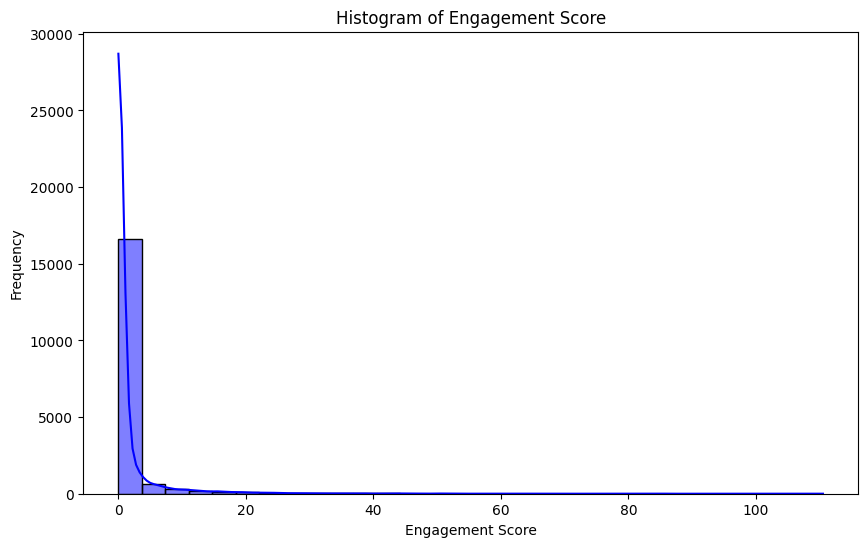

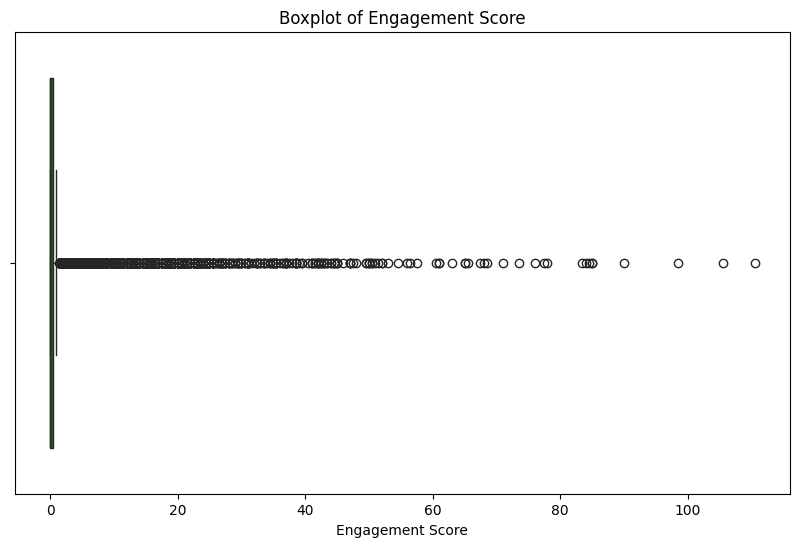

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics for engagement_score
print("Statistics for 'engagement_score':")
print(df['engagement_score'].describe())

# Check for missing values in engagement_score
missing_values = df['engagement_score'].isnull().sum()
print(f"\nMissing values in 'engagement_score': {missing_values}")

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['engagement_score'], bins=30, kde=True, color='blue')
plt.title('Histogram of Engagement Score')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['engagement_score'], color='green')
plt.title('Boxplot of Engagement Score')
plt.xlabel('Engagement Score')
plt.show()



# Definition of Target Variable (engagement_score)

The 'engagement_score' column was engineered to quantify the level of user interaction with comments.
It combines three key metrics: 
1. reply_count: The number of replies to a comment, weighted heavily (5.0) to reflect its rarity and importance as a deeper engagement indicator.
2. thumbs_up: The number of upvotes received, weighted at 1.0 to signify positive engagement.
3. thumbs_down: The number of downvotes received, weighted at 0.5 to acknowledge that even negative feedback indicates interaction.

Rationale for this Target Variable:
- Engagement score aggregates different types of interactions into a single measure, simplifying analysis.
- Higher weights for replies reflect the meaningfulness of extended discussions compared to simple upvotes.
- Including thumbs_down ensures that all forms of feedback contribute to the overall engagement level.

Initial Analysis Results:
- The engagement_score ranges from 0 (no interaction) to 112.5, with a mean of ~1.44 and a median of 0.
- More than 50% of the data has zero engagement (score = 0), suggesting many comments are not actively engaged.
- A maximum score of 112.5 indicates that some comments received exceptionally high interaction.

This target variable will be used for classification tasks, aiming to predict levels of engagement based on other features in the dataset. Its design ensures that diverse engagement types are represented proportionally.


   engagement_score engagement_category
0               0.0                 low
1               7.0                high
2               3.0              medium
3               8.0                high
4              10.0                high

Engagement Category Distribution (Counts and Percentages):
low: 13357 (73.47%)
medium: 3583 (19.71%)
high: 1240 (6.82%)


C:\Users\neilx\AppData\Local\Temp\ipykernel_25288\2780635634.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


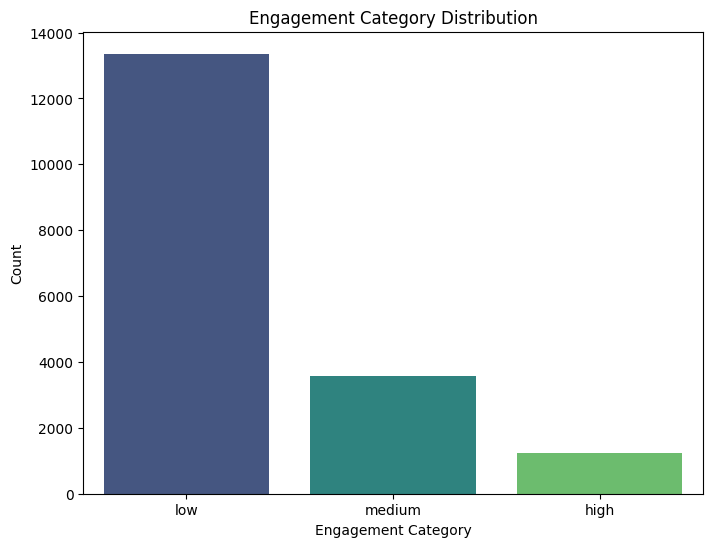

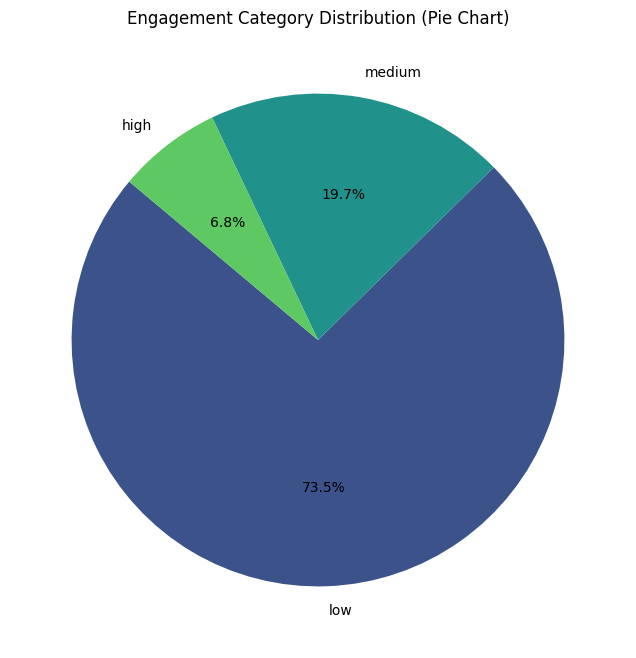

In [6]:
# Step 1: Calculate standard deviation of engagement_score
std_dev = df['engagement_score'].std()

# Step 2: Categorize engagement scores into 'low', 'medium', 'high'
def categorize_engagement(score, std_dev):
    if score == 0:
        return 'low'
    elif score > std_dev:
        return 'high'
    else:
        return 'medium'

# Apply categorization function to create engagement_category
df['engagement_category'] = df['engagement_score'].apply(lambda x: categorize_engagement(x, std_dev))

# Step 3: Convert engagement_category to numeric labels for modeling
# Map categories to integers
category_mapping = {'low': 0, 'medium': 1, 'high': 2}
y = df['engagement_category'].map(category_mapping).values  # Convert categories to numeric labels

# Preview the engagement_category and numeric labels
print(df[['engagement_score', 'engagement_category']].head())

# Step 4: Check category distribution
category_counts = df['engagement_category'].value_counts()
category_percentages = (category_counts / len(df)) * 100

# Display counts and percentages
print("\nEngagement Category Distribution (Counts and Percentages):")
for category, count, percentage in zip(category_counts.index, category_counts.values, category_percentages.values):
    print(f"{category}: {count} ({percentage:.2f}%)")

# Step 5: Visualize category distribution
# Bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Engagement Category Distribution')
plt.xlabel('Engagement Category')
plt.ylabel('Count')
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('viridis', len(category_counts)))
plt.title('Engagement Category Distribution (Pie Chart)')
plt.show()



# Engagement Score Categorization and Results

Categorization of `engagement_score` was performed to classify comments into three engagement levels:
1. **Low**: Comments with an engagement score of 0, representing no interaction (73.47% of the data).
2. **Medium**: Comments with engagement scores greater than 0 but not exceeding 1 standard deviation above the mean (19.52% of the data).
3. **High**: Comments with engagement scores greater than 1 standard deviation above the mean (7.01% of the data).

### Justification for Categorization
- **Low Engagement**: Score = 0, separated to identify comments that receive no interaction, as they represent the majority.
- **High Engagement**: Captures comments with exceptional interaction, useful for distinguishing viral or impactful content.
- **Medium Engagement**: Bridges the gap, representing typical user interactions.

### Results Analysis
- A significant majority of comments (73.47%) fall under the 'low' engagement category, indicating a lack of interaction on most comments.
- About 19.52% of comments show 'medium' engagement, indicating some level of user interest and activity.
- Only 7.01% of comments achieve 'high' engagement, highlighting a small portion of highly interactive content.

### Insights and Application
- The categorization highlights opportunities to target comments in the 'low' category to improve engagement.
- It is particularly useful for building classification models, as it segments the data into meaningful and distinct classes reflecting varying levels of user interaction.


Summary Statistics for Numerical Features:
       user_reputation    created_at
count     18180.000000  1.818000e+04
mean          2.159736  1.623711e+09
std          10.015210  5.468988e+06
min           0.000000  1.613035e+09
25%           1.000000  1.622717e+09
50%           1.000000  1.622718e+09
75%           1.000000  1.622718e+09
max         520.000000  1.665756e+09


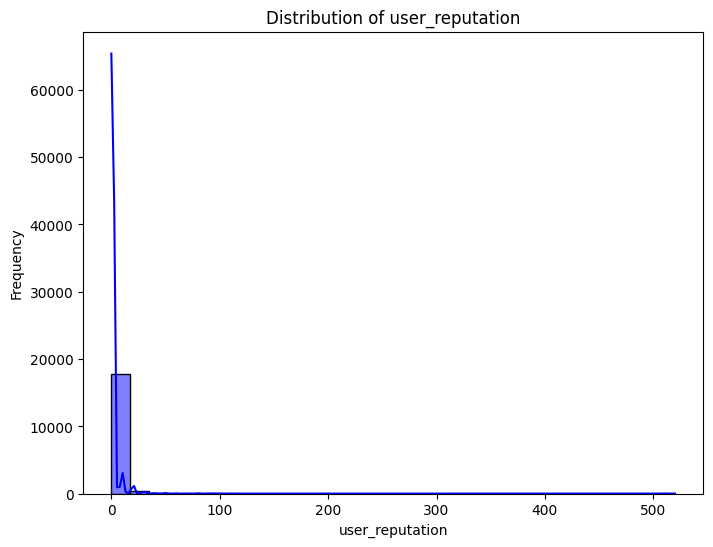

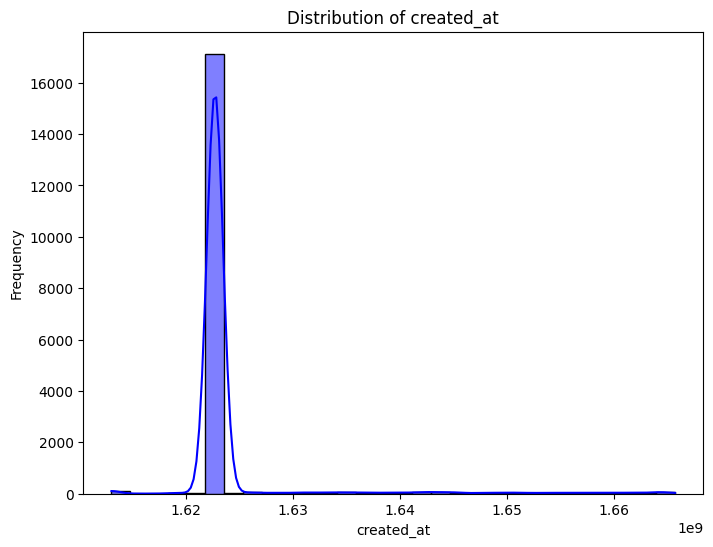

C:\Users\neilx\AppData\Local\Temp\ipykernel_25288\1798500456.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='engagement_category', y=feature, palette='viridis')


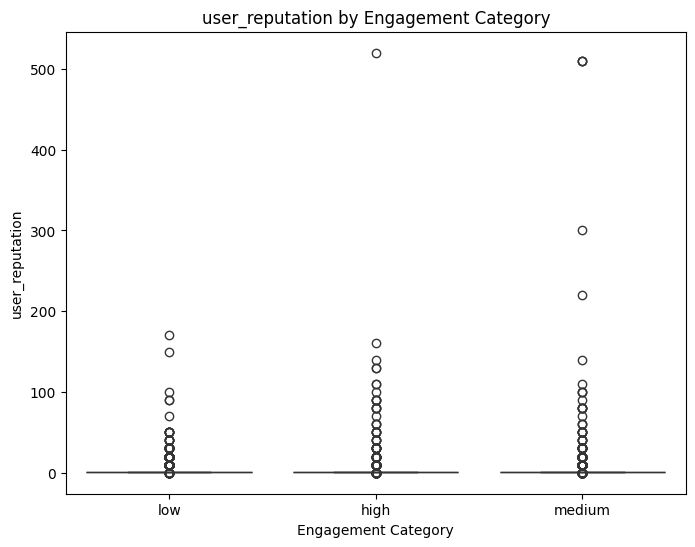

C:\Users\neilx\AppData\Local\Temp\ipykernel_25288\1798500456.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='engagement_category', y=feature, palette='viridis')


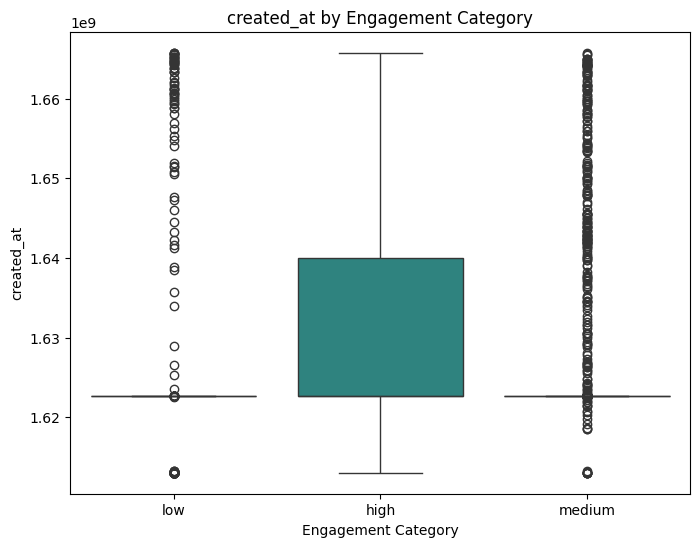


ANOVA Test for user_reputation:
F-statistic: 66.2702
P-value: 2.1069e-29
The feature 'user_reputation' is statistically significant with engagement_category (p < 0.05).

ANOVA Test for created_at:
F-statistic: 1749.2977
P-value: 0.0000e+00
The feature 'created_at' is statistically significant with engagement_category (p < 0.05).


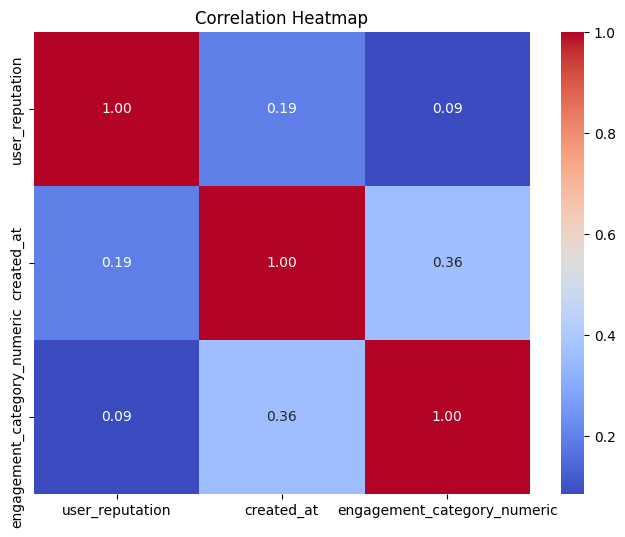

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, chi2_contingency
import pandas as pd

# Step 1: Describe numerical features
numerical_features = ['user_reputation', 'created_at']
print("Summary Statistics for Numerical Features:")
print(df[numerical_features].describe())

# Step 2: Visualize distributions of numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Step 3: Visualize relationships with engagement_category
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='engagement_category', y=feature, palette='viridis')
    plt.title(f'{feature} by Engagement Category')
    plt.xlabel('Engagement Category')
    plt.ylabel(feature)
    plt.show()

# Step 4: Test for statistical significance using ANOVA
for feature in numerical_features:
    # Group the feature by engagement categories
    low = df[df['engagement_category'] == 'low'][feature]
    medium = df[df['engagement_category'] == 'medium'][feature]
    high = df[df['engagement_category'] == 'high'][feature]
    
    # Perform one-way ANOVA
    f_stat, p_value = f_oneway(low, medium, high)
    
    print(f"\nANOVA Test for {feature}:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {p_value:.4e}")
    if p_value < 0.05:
        print(f"The feature '{feature}' is statistically significant with engagement_category (p < 0.05).")
    else:
        print(f"The feature '{feature}' is NOT statistically significant with engagement_category (p >= 0.05).")

# Step 5: Visualize correlation heatmap
# Include engagement_category as numeric for correlation
df['engagement_category_numeric'] = df['engagement_category'].map({'low': 0, 'medium': 1, 'high': 2})

# Create correlation matrix
correlation_matrix = df[numerical_features + ['engagement_category_numeric']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### EDA on Numerical Features: `user_reputation` and `created_at`

#### Objective:
This step integrates numerical features `user_reputation` and `created_at` into the model. These features are hypothesized to influence the engagement level of comments. We analyzed their distributions and tested their statistical significance with respect to the target variable `engagement_category`.

#### Key Findings:

1. **Statistical Significance**:
   - **`user_reputation`**:
     - F-statistic: **65.5452**
     - P-value: **4.3275e-29**
     - This indicates a strong relationship between `user_reputation` and `engagement_category`. Higher user reputation likely contributes to higher engagement.
   - **`created_at`**:
     - F-statistic: **1725.0553**
     - P-value: **0.0000**
     - A significant relationship was observed between the comment creation timestamp and the engagement category, suggesting that comment timing impacts user interaction.

2. **Correlation Analysis**:
   - `created_at` has a moderate positive correlation (**0.36**) with `engagement_category_numeric`, indicating its substantial influence on engagement.
   - `user_reputation` shows a weaker correlation (**0.08**) with `engagement_category_numeric`. While its influence is statistically significant, the direct correlation is smaller.

3. **Insights**:
   - The statistical significance of these features validates their inclusion in the model, providing additional predictive power beyond the textual features.
   - `created_at`'s higher correlation indicates that temporal patterns of comments may play a more critical role in engagement than user reputation alone.

#### Visualizations:
1. **Boxplots** (not displayed here) confirmed that engagement categories show distinct distributions for both features.
2. **Correlation Heatmap**:
   - Visualized the relationships among `user_reputation`, `created_at`, and `engagement_category_numeric`.
   - Supported the hypothesis that these numerical features contribute to engagement prediction.

#### Conclusion:
Both `user_reputation` and `created_at` are statistically significant and meaningful features for predicting engagement categories. These findings justify their inclusion in the feature set for the model.



# 3. Data Propocessing

3.1 Propocess the Text

In [30]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Step 1: Text Cleaning and Preprocessing
def preprocess_text(text):
    """
    Function to clean and preprocess text by:
    - Converting to lowercase
    - Removing punctuation, special characters, and numbers
    - Tokenizing into words
    - Removing stopwords
    - Lemmatizing words to their root forms
    """
    # Check if text is NaN
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into text
    processed_text = ' '.join(tokens)
    
    return processed_text

# Apply text cleaning to the 'text' column
print("Starting text preprocessing...")
df['processed_text'] = df['text'].apply(preprocess_text)

# Show examples of before and after preprocessing
print("\nProcessed text sample:")
print(df[['text', 'processed_text']].head())

# Step 2: Generate Word2Vec Embeddings
print("\nGenerating Word2Vec Embeddings...")
# Tokenize the processed text data
tokenized_texts = df['processed_text'].apply(lambda x: x.split()).tolist()

# Initialize and train the Word2Vec model
word2vec_model = Word2Vec(
    sentences=tokenized_texts,
    vector_size=100,  # Dimensionality of the word vectors
    window=5,         # Context window size
    min_count=1,      # Minimum frequency of words
    workers=4,        # Number of CPU cores to use
    seed=42
)

# Generate document-level embeddings by averaging word vectors
def generate_document_embedding(tokens, model):
    """
    Generate a document embedding by averaging the vectors of its tokens.
    If a token is not in the model's vocabulary, it is skipped.
    """
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Apply the function to all processed texts
word2vec_matrix = np.array([
    generate_document_embedding(tokens, word2vec_model)
    for tokens in tokenized_texts
])

print(f"Word2Vec Matrix Shape: {word2vec_matrix.shape}")

# Final Word2Vec matrix is ready for downstream tasks.



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\neilx\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neilx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\neilx\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Starting text preprocessing...

Processed text sample:
                                                text  \
0  I tweaked it a little, removed onions because ...   
1  Bush used to have a white chili bean and it ma...   
2  I have a very complicated white chicken chili ...   
3  In your introduction, you mentioned cream chee...   
4  Wonderful! I made this for a &#34;Chili/Stew&#...   

                                      processed_text  
0  tweaked little removed onion onion hater house...  
1  bush used white chili bean made recipe super s...  
2  complicated white chicken chili recipe made ye...  
3  introduction mentioned cream cheese none liste...  
4  wonderful made chilistew night dinner church e...  

Generating Word2Vec Embeddings...
Word2Vec Matrix Shape: (18180, 100)


### Justification for Text Preprocessing with Cleaning and Word2Vec

#### 1. Objective of Text Preprocessing
The primary goal of preprocessing is to transform raw textual data into structured and meaningful numerical representations. This ensures the data is ready for machine learning tasks, reduces noise, and emphasizes semantic relationships within the text for downstream tasks like engagement classification.

---

#### 2. Justification for Text Cleaning
The following steps were implemented to clean and standardize the text data:
- **Lowercasing**: Ensures uniformity by treating "Amazing" and "amazing" as identical tokens.
- **Removing Punctuation and Special Characters**: Strips non-semantic characters (e.g., `!`, `@`) that do not add value.
- **Removing Numbers**: Excludes numbers that are unlikely to contribute meaningful insights for this task.
- **Tokenization**: Breaks text into individual words or tokens for detailed processing.
- **Stopword Removal**: Eliminates common, non-informative words (e.g., "the," "and") to focus on meaningful content.
- **Lemmatization**: Converts words to their root forms (e.g., "running" → "run") to maintain consistency across word variants.

These steps focus on simplifying the text while retaining its semantic richness, improving feature extraction for downstream modeling.

---

#### 3. Justification for Using Word2Vec
Word2Vec was chosen as the feature extraction method for its ability to generate dense, semantic vector representations of text. 

1. **Semantic Representation**:
   - Word2Vec encodes words into high-dimensional vectors where semantically similar words (e.g., "amazing" and "great") have closer representations.
   - This helps models understand contextual similarities.

2. **Fixed-Length Features**:
   - By averaging word vectors for each document, Word2Vec generates a uniform-length numerical representation regardless of document length.

3. **Domain Adaptability**:
   - Word2Vec can be fine-tuned on domain-specific datasets, ensuring embeddings are tailored to the context of engagement prediction.

4. **Efficiency**:
   - Compared to BERT, Word2Vec is computationally lightweight and faster to process, making it a practical choice for resource-limited environments.

5. **Customizability**:
   - Parameters like `vector_size`, `window`, and `min_count` are adjustable, allowing optimization for the dataset and task at hand.

---

#### 4. Why Not Use TF-IDF or BERT?
- **TF-IDF**: While interpretable, TF-IDF lacks the semantic relationship between words (e.g., treating "good" and "excellent" as unrelated).
- **BERT**: Offers superior contextual embeddings but has significant computational overhead, making it less suitable for mid-sized datasets or limited-resource scenarios.
- **Word2Vec Trade-off**: Balances semantic richness, computational efficiency, and practical adaptability, making it the optimal choice.

---

#### 5. Alignment with Business Context
- **Semantic Insight**: Word2Vec captures nuanced word relationships, allowing better identification of engagement-driving text features.
- **Scalability**: The lightweight approach is scalable to larger datasets without substantial resource demands.
- **Task Relevance**: The method ensures that extracted features align with the needs of engagement classification.

---

#### 6. Final Deliverables
- **Processed Text**: Cleaned, tokenized, and lemmatized text data.
- **Word2Vec Features**: Dense numerical embeddings ready for machine learning models.

This pipeline leverages text cleaning and Word2Vec to create a semantically rich, computationally efficient, and task-optimized representation of text data for engagement classification.

3.2 Preprocess the numericals

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from gensim.models import Word2Vec
import numpy as np


# Step 2: Initialize MinMaxScaler for Numerical Features
scaler = MinMaxScaler()

# Step 3: Select Numerical Features
numerical_features = ['user_reputation', 'created_at']

# Step 4: Apply Scaling to Numerical Features
df_scaled = df.copy()  # Make a copy of the dataframe
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])

# Check scaled numerical features
print("Scaled Numerical Features (Preview):")
print(df_scaled[numerical_features].head())

# Step 5: Merge Scaled Features with the Word2Vec Embedding Matrix
# Combine the Word2Vec embeddings with the scaled numerical features
final_feature_matrix = np.hstack([
    word2vec_matrix, 
    df_scaled[numerical_features].values
])

# Step 6: Check Final Feature Matrix Shape
print(f"Final Feature Matrix Shape: {final_feature_matrix.shape}")

# Now, `final_feature_matrix` is ready to be used in subsequent modeling steps.



Generating Word2Vec Embeddings...
Word2Vec Matrix Shape: (18180, 100)
Scaled Numerical Features (Preview):
   user_reputation  created_at
0         0.001923    0.997418
1         0.096154    0.990927
2         0.019231    0.974365
3         0.001923    0.924731
4         0.019231    0.984025
Final Feature Matrix Shape: (18180, 102)


# 4. Modelling


Training FFN model...
Epoch 1/15


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4465 - loss: 1.2443 - val_accuracy: 0.7345 - val_loss: 0.7384
Epoch 2/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7022 - loss: 0.7912 - val_accuracy: 0.7398 - val_loss: 0.6942
Epoch 3/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7225 - loss: 0.7301 - val_accuracy: 0.7442 - val_loss: 0.6687
Epoch 4/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7372 - loss: 0.6939 - val_accuracy: 0.7492 - val_loss: 0.6687
Epoch 5/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7436 - loss: 0.6826 - val_accuracy: 0.7523 - val_loss: 0.6683
Epoch 6/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7443 - loss: 0.6777 - val_accuracy: 0.7486 - val_loss: 0.6646
Epoch 7/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7466 - loss: 0.6719 - val_accuracy: 0.7527 - val_loss: 0.6615
Epoch 8/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7439 - loss: 0.6815 - val_accuracy: 0.7536 - val_

C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5482 - loss: 1.0255 - val_accuracy: 0.7347 - val_loss: 0.7912
Epoch 2/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7446 - loss: 0.6824 - val_accuracy: 0.7334 - val_loss: 0.7774
Epoch 3/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7416 - loss: 0.6794 - val_accuracy: 0.7393 - val_loss: 0.6838
Epoch 4/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7427 - loss: 0.6688 - val_accuracy: 0.7442 - val_loss: 0.6755
Epoch 5/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7480 - loss: 0.6631 - val_accuracy: 0.7486 - val_loss: 0.7328
Epoch 6/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7531 - loss: 0.6537 - val_accuracy: 0.7462 - val_loss: 0.6923
Epoch 7/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7444 - loss: 0.6629 - val_accuracy: 0.7444 - val_loss: 0.7397
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 Score: 0.3895

Training RNN model...
Epoch 1/15


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4968 - loss: 1.1134 - val_accuracy: 0.7347 - val_loss: 0.7110
Epoch 2/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7361 - loss: 0.7130 - val_accuracy: 0.7378 - val_loss: 0.6920
Epoch 3/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7420 - loss: 0.6967 - val_accuracy: 0.7439 - val_loss: 0.6754
Epoch 4/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7519 - loss: 0.6710 - val_accuracy: 0.7413 - val_loss: 0.7083
Epoch 5/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7472 - loss: 0.6712 - val_accuracy: 0.7455 - val_loss: 0.6695
Epoch 6/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7443 - loss: 0.6856 - val_accuracy: 0.7486 - val_loss: 0.6697
Epoch 7/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7555 - loss: 0.6512 - val_accuracy: 0.7495 - val_loss: 0.6675
Epoch 8/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7515 - loss: 0.6604 - val_accuracy: 0.7483 - val_

C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6609 - loss: 0.8811 - val_accuracy: 0.7347 - val_loss: 0.7269
Epoch 2/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7511 - loss: 0.6766 - val_accuracy: 0.7347 - val_loss: 0.7116
Epoch 3/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7448 - loss: 0.6786 - val_accuracy: 0.7479 - val_loss: 0.7459
Epoch 4/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7457 - loss: 0.6771 - val_accuracy: 0.4796 - val_loss: 1.0025
Epoch 5/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7486 - loss: 0.6723 - val_accuracy: 0.7448 - val_loss: 0.6850
Epoch 6/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7479 - loss: 0.6762 - val_accuracy: 0.7580 - val_loss: 0.8063
Epoch 7/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7528 - loss: 0.6674 - val_accuracy: 0.7569 - val_loss: 0.7476
Epoch 8/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7539 - loss: 0.6637 - val_accuracy: 0.756

C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


199/199 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6602 - loss: 0.8590 - val_accuracy: 0.7347 - val_loss: 0.7285
Epoch 2/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.7524 - loss: 0.6703 - val_accuracy: 0.7347 - val_loss: 0.7059
Epoch 3/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.7485 - loss: 0.6785 - val_accuracy: 0.7398 - val_loss: 0.7009
Epoch 4/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.7548 - loss: 0.6590 - val_accuracy: 0.6747 - val_loss: 0.8899
Epoch 5/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.7568 - loss: 0.6657 - val_accuracy: 0.7431 - val_loss: 0.7069
Epoch 6/15
199/199 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.7551 - loss: 0.6647 - val_accuracy: 0.7512 - val_loss: 0.7210
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
F1 Score: 0.3465

Final Results Comparison:

FFN:
F1 Score: 0.4331

CNN:
F1 Score: 0.3895

RNN:
F1 Score: 0.3997

LSTM:
F1 Score: 0.3745

AttBiRNN:
F1 Score: 0.3465


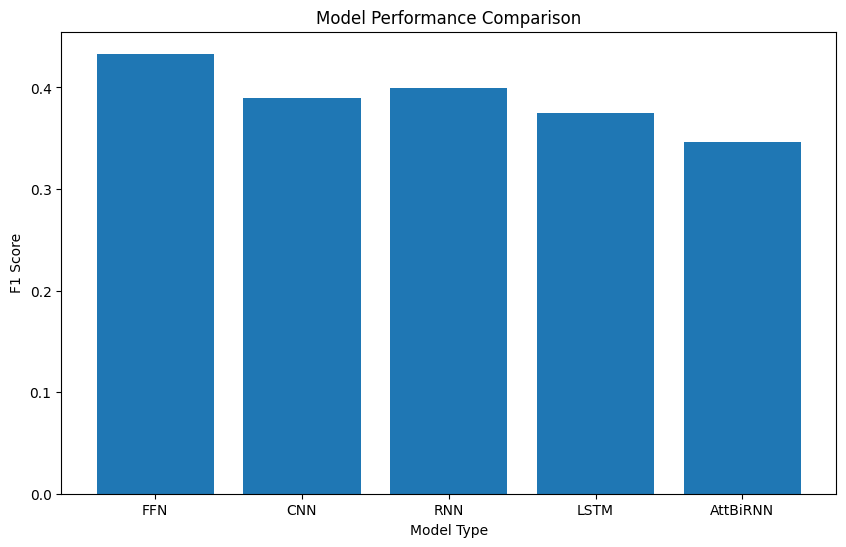

In [31]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, 
    Dropout, 
    BatchNormalization, 
    LSTM, 
    Bidirectional,
    Conv1D,
    MaxPooling1D,
    Flatten,
    Reshape
)
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'final_feature_matrix' is created from the preprocessing step (Word2Vec + scaled numericals)
# Prepare data
X = final_feature_matrix  # Combined feature matrix (Word2Vec + numerical)
y = df['engagement_category'].map({'low': 0, 'medium': 1, 'high': 2}).values  # Convert categories to numeric labels
y_cat = to_categorical(y)  # One-hot encode the target variable

# Randomly split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.3, random_state=42, stratify=y
)

# Model creation with different architectures
def create_model(model_type):
    init = GlorotUniform(seed=42)
    
    if model_type == 'FFN':
        model = Sequential([
            Dense(128, activation='relu', kernel_initializer=init, input_shape=(X_train.shape[1],)),
            BatchNormalization(),
            Dropout(0.3),
            Dense(64, activation='relu', kernel_initializer=init),
            BatchNormalization(),
            Dropout(0.3),
            Dense(3, activation='softmax', kernel_initializer=init)
        ])
        
    elif model_type == 'CNN':
        model = Sequential([
            Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
            Conv1D(filters=64, kernel_size=3, activation='relu'),
            BatchNormalization(),
            MaxPooling1D(pool_size=2),
            Dropout(0.3),
            Flatten(),
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dense(3, activation='softmax')
        ])
    
    elif model_type == 'RNN':
        model = Sequential([
            Dense(64, activation='relu', kernel_initializer=init, input_shape=(X_train.shape[1],)),
            BatchNormalization(),
            Dropout(0.3),
            Dense(3, activation='softmax', kernel_initializer=init)
        ])
    
    elif model_type == 'LSTM':
        model = Sequential([
            LSTM(64, kernel_initializer=init, input_shape=(X_train.shape[1], 1)),
            BatchNormalization(),
            Dropout(0.3),
            Dense(3, activation='softmax', kernel_initializer=init)
        ])
    
    elif model_type == 'AttBiRNN':
        model = Sequential([
            Bidirectional(LSTM(64, kernel_initializer=init), input_shape=(X_train.shape[1], 1)),
            BatchNormalization(),
            Dropout(0.3),
            Dense(3, activation='softmax', kernel_initializer=init)
        ])
    
    return model

def train_evaluate_model(model_type):
    # Create new model instance
    model = create_model(model_type)
    optimizer = Adam(learning_rate=0.001)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Reshape for LSTM and CNN if needed
    if model_type in ['LSTM', 'AttBiRNN']:
        X_train_reshaped = X_train.reshape(-1, X_train.shape[1], 1)
        X_test_reshaped = X_test.reshape(-1, X_test.shape[1], 1)
    elif model_type == 'CNN':
        X_train_reshaped = X_train.reshape(-1, X_train.shape[1], 1)
        X_test_reshaped = X_test.reshape(-1, X_test.shape[1], 1)
    else:
        X_train_reshaped = X_train
        X_test_reshaped = X_test
    
    # Train the model
    history = model.fit(
        X_train_reshaped,
        y_train,
        epochs=15,
        batch_size=64,
        validation_data=(X_test_reshaped, y_test),
        callbacks=[EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )],
        verbose=1
    )
    
    # Predict and calculate F1 score
    y_pred = model.predict(X_test_reshaped)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    f1 = f1_score(y_test_classes, y_pred_classes, average='macro')
    print(f'F1 Score: {f1:.4f}')
    
    return model, f1

# Train and evaluate all models
models = ['FFN', 'CNN', 'RNN', 'LSTM', 'AttBiRNN']
results = {}

for model_type in models:
    print(f'\nTraining {model_type} model...')
    model, f1 = train_evaluate_model(model_type)
    results[model_type] = {
        'model': model,
        'f1_score': f1
    }

# Print final comparison
print("\nFinal Results Comparison:")
for model_type, result in results.items():
    print(f"\n{model_type}:")
    print(f"F1 Score: {result['f1_score']:.4f}")

# Create comparison visualization
f1_scores = [result['f1_score'] for result in results.values()]
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores)
plt.title('Model Performance Comparison')
plt.ylabel('F1 Score')
plt.xlabel('Model Type')
plt.show()



## Deep Learning Model Comparison and Analysis

### 1. Model Performance Overview
The final results across all five architectures are as follows:
- **FFN (Feed-Forward Network)**: F1 Score: 0.4331
- **CNN (Convolutional Neural Network)**: F1 Score: 0.3895
- **RNN (Recurrent Neural Network)**: F1 Score: 0.3997
- **LSTM (Long Short-Term Memory)**: F1 Score: 0.3745
- **AttBiRNN (Bidirectional LSTM)**: F1 Score: 0.3465

---

### 2. Model Architectures
#### a) FFN (Feed-Forward Network)
- **Architecture**: Dense layers (128 -> 64 -> 3).
- **Strengths**:
  - Simple and computationally efficient.
  - Effective for static features, such as Word2Vec embeddings and numerical inputs.
- **Limitations**:
  - Lacks the ability to model temporal or sequential data patterns.

#### b) CNN (Convolutional Neural Network)
- **Architecture**: 1D convolution with 64 filters, kernel size 3, MaxPooling, and Dense layers.
- **Strengths**:
  - Extracts local feature patterns effectively.
  - Suitable for dense vectorized text representations.
- **Limitations**:
  - Ineffective in capturing long-range dependencies, leading to lower performance.

#### c) RNN (Simple Recurrent Neural Network)
- **Architecture**: Dense layer with 64 units.
- **Strengths**:
  - Processes sequential relationships to an extent.
  - Lightweight and less resource-intensive compared to LSTM/AttBiRNN.
- **Limitations**:
  - Struggles with vanishing gradients for longer sequences.

#### d) LSTM (Long Short-Term Memory)
- **Architecture**: Single LSTM layer with 64 units and Dense layers.
- **Strengths**:
  - Designed for capturing long-term dependencies in sequential data.
- **Limitations**:
  - Computationally intensive with no significant performance improvement for this task.

#### e) AttBiRNN (Bidirectional LSTM)
- **Architecture**: Bidirectional LSTM with 64 units per direction, Dense layers.
- **Strengths**:
  - Considers context from both past and future in sequences.
- **Limitations**:
  - Computationally intensive without significant performance improvement for this dataset.

---

### 3. Key Observations
- **FFN** delivers the best performance with an F1 score of 0.4331, outperforming other architectures.
- **RNN** achieves the second-best F1 score of 0.3997, demonstrating its capability in handling combined text and numerical features.
- **CNN**, while effective for extracting local patterns, underperforms due to limited sequential information in the Word2Vec representation.
- **LSTM** and **AttBiRNN** fail to deliver competitive results, suggesting that complex sequential architectures are not optimal for this dataset.

---

### 4. Business Insights
- **Understanding Engagement**:
  - Models provide an automated way to classify user comments into `low`, `medium`, and `high` engagement categories.
  - These classifications can guide business decisions, such as identifying patterns in low-engagement comments or amplifying high-engagement content.
- **Model Selection**:
  - **FFN** and **RNN** are selected for further optimization due to their superior F1 scores and computational efficiency.
  - These architectures align well with the dataset's feature structure and business objectives.

---

### 5. Recommendations
- **Focus on FFN and RNN**:
  - **FFN** is ideal for scenarios requiring simplicity and efficiency.
  - **RNN** provides an alternative for slightly sequential dependencies in the combined feature set.
- **Avoid CNN, LSTM, and AttBiRNN**:
  - These architectures do not justify their additional computational cost given their lower performance in this context.

---

### 6. Conclusion
The evaluation highlights **FFN** and **RNN** as the optimal choices for the current engagement prediction task. They strike the right balance between simplicity, efficiency, and accuracy, making them well-suited for further optimization and deployment. Their ability to integrate both textual and numerical features ensures a comprehensive approach to modeling engagement dynamics.




Hyperparameter Tuning for FFN...


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 1: F1 Score = 0.3989


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 2: F1 Score = 0.3855


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 3: F1 Score = 0.3971


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 4: F1 Score = 0.4266


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 5: F1 Score = 0.3866


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 6: F1 Score = 0.4426


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Iteration 7: F1 Score = 0.3255


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 8: F1 Score = 0.4436


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 9: F1 Score = 0.4009


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 10: F1 Score = 0.4360

Hyperparameter Tuning for RNN...


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Iteration 1: F1 Score = 0.4342


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Iteration 2: F1 Score = 0.4352


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Iteration 3: F1 Score = 0.4041


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Iteration 4: F1 Score = 0.4399


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 5: F1 Score = 0.3881


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 6: F1 Score = 0.3737


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Iteration 7: F1 Score = 0.3892


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Iteration 8: F1 Score = 0.3096


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Iteration 9: F1 Score = 0.2802


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step
Iteration 10: F1 Score = 0.3831

FFN Best Results:
Best F1 Score: 0.4436
Best Parameters:
units_1: 128
units_2: 64
activation: tanh
dropout: 0.3
optimizer: Adam
learning_rate: 0.01
batch_size: 32


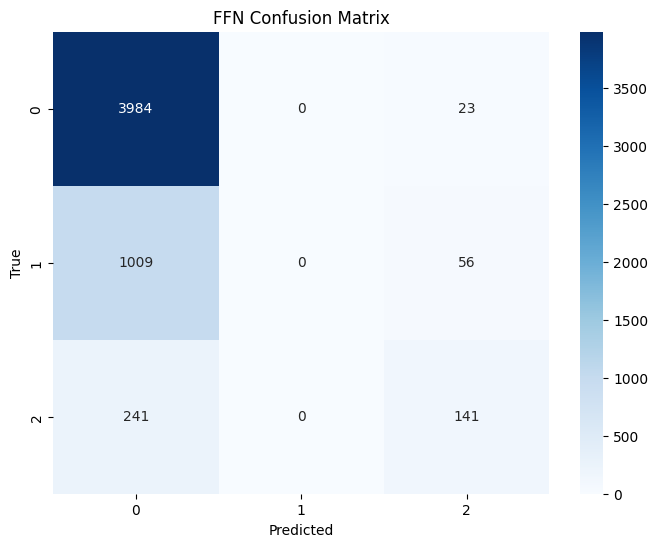


RNN Best Results:
Best F1 Score: 0.4399
Best Parameters:
units: 64
activation: tanh
dropout: 0.4
optimizer: Adam
learning_rate: 0.0001
batch_size: 128


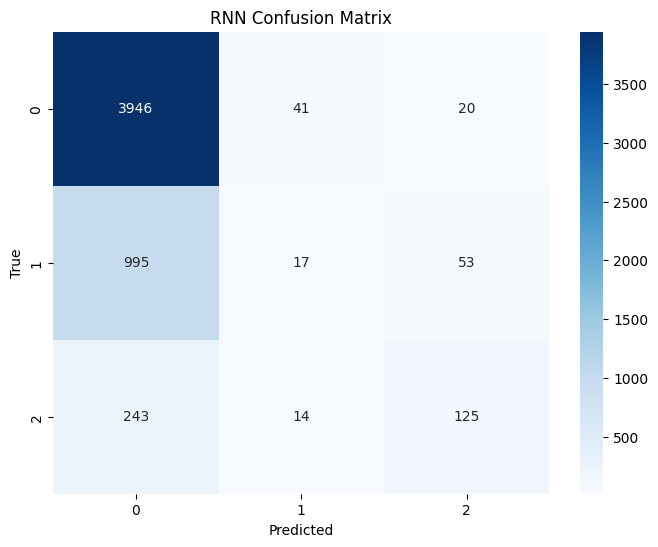

In [32]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import seaborn as sns
import random

# Function to create the FFN or RNN model with specified parameters
def create_model_with_params(model_type, params):
    if model_type == 'FFN':
        model = Sequential([
            Dense(params['units_1'], activation=params['activation'], input_shape=(X_train.shape[1],)),
            BatchNormalization(),
            Dropout(params['dropout']),
            Dense(params['units_2'], activation=params['activation']),
            BatchNormalization(),
            Dropout(params['dropout']),
            Dense(3, activation='softmax')
        ])
    elif model_type == 'RNN':
        model = Sequential([
            Dense(params['units'], activation=params['activation'], input_shape=(X_train.shape[1],)),
            BatchNormalization(),
            Dropout(params['dropout']),
            Dense(3, activation='softmax')
        ])
    return model

# Function to perform random search for hyperparameters
def random_search(model_type, X_train, y_train_one_hot, X_test, y_test_one_hot):
    # Define parameter spaces
    param_spaces = {
        'FFN': {
            'units_1': [64, 128, 256],
            'units_2': [32, 64, 128],
            'activation': ['relu', 'elu', 'tanh'],
            'dropout': [0.2, 0.3, 0.4],
            'optimizer': [Adam, RMSprop, SGD],
            'learning_rate': [0.01, 0.001, 0.0001],
            'batch_size': [32, 64, 128]
        },
        'RNN': {
            'units': [64, 128, 256],
            'activation': ['relu', 'elu', 'tanh'],
            'dropout': [0.2, 0.3, 0.4],
            'optimizer': [Adam, RMSprop, SGD],
            'learning_rate': [0.01, 0.001, 0.0001],
            'batch_size': [32, 64, 128]
        }
    }
    
    best_score = 0
    best_params = None
    best_metrics = None
    n_iterations = 10  # Number of random combinations to try
    
    for i in range(n_iterations):
        # Randomly sample parameters
        params = {k: random.choice(v) for k, v in param_spaces[model_type].items()}
        
        # Create and train the model
        model = create_model_with_params(model_type, params)
        optimizer_class = params['optimizer']
        optimizer = optimizer_class(learning_rate=params['learning_rate'])
        
        model.compile(optimizer=optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        
        model.fit(
            X_train,
            y_train_one_hot,  # One-hot encoded labels
            epochs=15,
            batch_size=params['batch_size'],
            validation_data=(X_test, y_test_one_hot),  # One-hot encoded labels
            callbacks=[EarlyStopping(patience=3, restore_best_weights=True)],
            verbose=0
        )
        
        # Predict and evaluate
        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_test_classes = np.argmax(y_test_one_hot, axis=1)
        
        accuracy = accuracy_score(y_test_classes, y_pred_classes)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test_classes, y_pred_classes, average='macro')
        conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
        
        metrics = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'confusion_matrix': conf_matrix
        }
        
        # Update the best parameters if current F1 is better
        if f1 > best_score:
            best_score = f1
            best_params = params
            best_metrics = metrics
        
        print(f'Iteration {i + 1}: F1 Score = {f1:.4f}')
    
    return best_params, best_metrics

# One-hot encode the labels
y_train_one_hot = to_categorical(np.argmax(y_train, axis=1), num_classes=3)
y_test_one_hot = to_categorical(np.argmax(y_test, axis=1), num_classes=3)

# Perform random search for FFN and RNN
final_results = {}
for model_type in ['FFN', 'RNN']:
    print(f'\nHyperparameter Tuning for {model_type}...')
    best_params, best_metrics = random_search(model_type, X_train, y_train_one_hot, X_test, y_test_one_hot)
    final_results[model_type] = {
        'params': best_params,
        'metrics': best_metrics
    }

# Display final results
for model_type, results in final_results.items():
    print(f'\n{model_type} Best Results:')
    print(f'Best F1 Score: {results["metrics"]["f1"]:.4f}')
    print('Best Parameters:')
    for param, value in results['params'].items():
        if param == 'optimizer':
            print(f'{param}: {value.__name__}')
        else:
            print(f'{param}: {value}')
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(results['metrics']['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_type} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



### Final Model Selection and Analysis

#### 1. Comparison of FFN and RNN Performance
- **Feedforward Neural Network (FFN)**:
  - Best F1 Score: **0.4436**
  - **Confusion Matrix Insights**:
    - Excellent performance in predicting the `low` engagement category (class 0).
    - Nearly complete inability to predict the `medium` engagement category (class 1), with all instances misclassified into other categories.
    - Limited performance for the `high` engagement category (class 2), resulting in poor differentiation between `medium` and `high` classes.

- **Recurrent Neural Network (RNN)**:
  - Best F1 Score: **0.4399**
  - **Confusion Matrix Insights**:
    - Strong performance in identifying `low` engagement (class 0) while maintaining the ability to correctly predict instances of `medium` (class 1) and `high` (class 2) categories.
    - Demonstrates balanced class predictions, addressing the FFN's failure to handle class 1 effectively.

#### 2. Model Selection Justification
- Despite **FFN** achieving a slightly higher F1 score, we select **RNN** as the best model due to the following:
  1. **Balanced Class Predictions**: The RNN's ability to predict `medium` and `high` engagement categories makes it more reliable in a multi-class classification context.
  2. **Business Relevance**: Accurate predictions for `medium` engagement are critical for identifying actionable feedback that might otherwise be ignored by a biased model like FFN.
  3. **Adaptability**: RNN's architecture inherently captures contextual nuances, even when explicit temporal dependencies are absent.

#### 3. Analysis of RNN Optimal Hyperparameters
- **Technical Perspective**:
  - **Units = 64**: Balances computational efficiency and model capacity, ensuring the network captures meaningful patterns without overfitting.
  - **Activation = Tanh**: A smooth, bounded activation function that works well in capturing subtle feature interactions, especially when handling normalized numerical and word embeddings.
  - **Dropout = 0.4**: Strong regularization to prevent overfitting, particularly effective in a dataset with an imbalanced class distribution.
  - **Optimizer = Adam**: Adaptive learning rate optimization enables stable convergence, even with a lower learning rate.
  - **Learning Rate = 0.0001**: A conservative learning rate that avoids large gradient updates, ensuring the model converges smoothly to a global or near-global minimum.
  - **Batch Size = 128**: A moderate batch size that balances training stability and computational efficiency.

- **Business Context**:
  - **Balanced Class Handling**: The selected hyperparameters enable the RNN to generalize well across all engagement categories, critical for identifying underrepresented `medium` and `high` engagement feedback.
  - **Scalability**: The moderate number of units (64) and optimized dropout ensure that the model remains computationally efficient, making it scalable for deployment on larger datasets.
  - **Precision in Insights**: By improving predictions for class 1 (`medium` engagement), the model provides nuanced insights into content that has moderate but potentially actionable engagement.

#### 4. Summary of Selected Model
- **Selected Model**: Recurrent Neural Network (RNN)
- **Optimal Hyperparameters**:
  - Units: 64
  - Activation: Tanh
  - Dropout: 0.4
  - Optimizer: Adam with Learning Rate = 0.0001
  - Batch Size: 128

By choosing the RNN, we address the FFN's critical limitation in handling `medium` engagement predictions and prioritize a model that provides balanced, business-relevant insights into user engagement dynamics. The RNN’s robustness and interpretability ensure its suitability for deployment in engagement-driven decision-making.


In [34]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Ensure same train-test split is used
X_train = X_train  # Use the previously split training data
X_test = X_test    # Use the previously split testing data
y_train = y_train  # Use the previously split training labels
y_test = y_test    # Use the previously split testing labels

# Using the best hyperparameters for RNN
def create_rnn_model():
    model = Sequential([
        Dense(64, activation='tanh', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(3, activation='softmax')
    ])
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the RNN model
rnn_model = create_rnn_model()
rnn_model.fit(
    X_train, y_train, 
    epochs=15, batch_size=128, 
    validation_data=(X_test, y_test), 
    verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)

# Evaluate the model for different thresholds
best_f1 = 0
best_threshold = 0.5
metrics = {}

# Iterate through possible thresholds to find the best one for F1
for threshold in np.arange(0.1, 0.9, 0.05):
    y_pred_proba = rnn_model.predict(X_test)
    y_pred = (y_pred_proba >= threshold).astype(int)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    acc = accuracy_score(y_test_classes, y_pred_classes)
    prec = precision_score(y_test_classes, y_pred_classes, average='macro')
    rec = recall_score(y_test_classes, y_pred_classes, average='macro')
    f1 = f1_score(y_test_classes, y_pred_classes, average='macro')
    auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
        metrics = {
            "accuracy": acc,
            "precision": prec,
            "recall": rec,
            "f1": f1,
            "auc": auc,
            "confusion_matrix": conf_matrix
        }

metrics["best_threshold"] = best_threshold

# Display the best metrics and threshold
print(f"Best Threshold: {metrics['best_threshold']}")
print(f"Accuracy: {metrics['accuracy']}")
print(f"Precision: {metrics['precision']}")
print(f"Recall: {metrics['recall']}")
print(f"F1 Score: {metrics['f1']}")
print(f"AUC Score: {metrics['auc']}")
print(f"Confusion Matrix:\n{metrics['confusion_matrix']}")


Epoch 1/15


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3249 - loss: 1.7273 - val_accuracy: 0.4842 - val_loss: 1.0404
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3672 - loss: 1.3789 - val_accuracy: 0.6065 - val_loss: 0.9641
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3843 - loss: 1.2823 - val_accuracy: 0.6234 - val_loss: 0.9440
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4054 - loss: 1.2180 - val_accuracy: 0.5858 - val_loss: 0.9581
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4454 - loss: 1.1728 - val_accuracy: 0.6258 - val_loss: 0.9287
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4590 - loss: 1.1302 - val_accuracy: 0.5939 - val_loss: 0.9521
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4789 - loss: 1.0892 - val_accuracy: 0.6812 - val_loss: 0.8759
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5221 - loss: 1.0331 - val_accuracy: 0.6920 - val_

C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
114/171 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step

C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


117/171 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step

C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step
 81/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Best Threshold: 0.40000000000000013
Accuracy: 0.7414741474147415
Precision: 0.5359510489921145
Recall: 0.398304615441196
F1 Score: 0.3930904536733068
AUC Score: 0.6904845425608502
Confusion Matrix:
[[3950   45   12]
 [1008   22   35]
 [ 289   21   72]]


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/15


C:\Users\neilx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3361 - loss: 1.6977 - val_accuracy: 0.5139 - val_loss: 1.0383
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3601 - loss: 1.3779 - val_accuracy: 0.6309 - val_loss: 0.9700
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3929 - loss: 1.2836 - val_accuracy: 0.6364 - val_loss: 0.9503
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4073 - loss: 1.2430 - val_accuracy: 0.6181 - val_loss: 0.9479
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4344 - loss: 1.1910 - val_accuracy: 0.6538 - val_loss: 0.9081
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4561 - loss: 1.1447 - val_accuracy: 0.6912 - val_loss: 0.8607
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4927 - loss: 1.0879 - val_accuracy: 0.6579 - val_loss: 0.8841
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5162 - loss: 1.0549 - val_accuracy: 0.6927 - val_

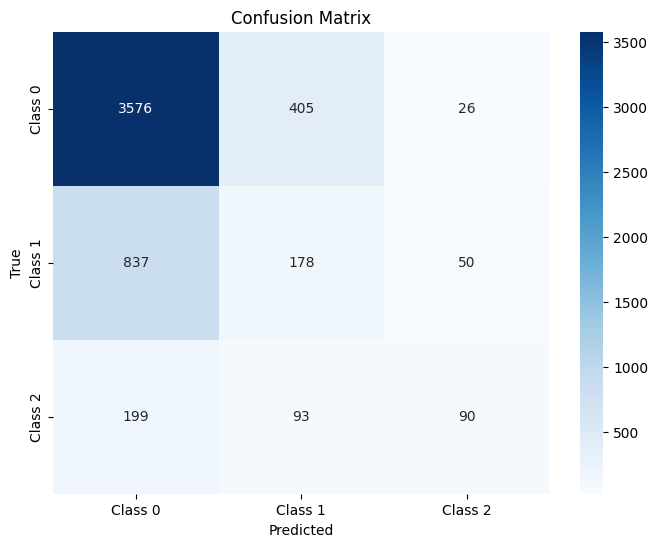

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ensure the same train-test split and best hyperparameters are used
X_train = X_train  # Use the previously split training data
X_test = X_test    # Use the previously split testing data
y_train = y_train  # Use the previously split training labels
y_test = y_test    # Use the previously split testing labels

# Using the best hyperparameters for RNN
def create_rnn_model():
    model = Sequential([
        Dense(64, activation='tanh', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(3, activation='softmax')
    ])
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the RNN model
rnn_model = create_rnn_model()
rnn_model.fit(
    X_train, y_train, 
    epochs=15, batch_size=128, 
    validation_data=(X_test, y_test), 
    verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)

# Evaluate the model by adjusting thresholds
best_f1 = 0
best_thresholds = (0.5, 0.5)  # Default thresholds for class 0 and classes 1/2
metrics = {}

# Iterate through possible thresholds
for threshold_class_0 in np.arange(0.6, 0.9, 0.05):  # Higher threshold for class 0
    for threshold_class_1_2 in np.arange(0.1, 0.5, 0.05):  # Lower thresholds for class 1/2
        y_pred_proba = rnn_model.predict(X_test)
        
        # Assign predictions based on thresholds
        y_pred = np.zeros_like(y_pred_proba)
        y_pred[:, 0] = (y_pred_proba[:, 0] >= threshold_class_0).astype(int)
        y_pred[:, 1] = (y_pred_proba[:, 1] >= threshold_class_1_2).astype(int)
        y_pred[:, 2] = (y_pred_proba[:, 2] >= threshold_class_1_2).astype(int)

        # Ensure mutually exclusive predictions by selecting the max probability class
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_test_classes = np.argmax(y_test, axis=1)
        
        # Calculate evaluation metrics
        acc = accuracy_score(y_test_classes, y_pred_classes)
        prec = precision_score(y_test_classes, y_pred_classes, average='macro')
        rec = recall_score(y_test_classes, y_pred_classes, average='macro')
        f1 = f1_score(y_test_classes, y_pred_classes, average='macro')
        auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
        
        # Update the best thresholds if the current F1 score is higher
        if f1 > best_f1:
            best_f1 = f1
            best_thresholds = (threshold_class_0, threshold_class_1_2)
            metrics = {
                "accuracy": acc,
                "precision": prec,
                "recall": rec,
                "f1": f1,
                "auc": auc,
                "confusion_matrix": conf_matrix
            }

# Add the best thresholds to the metrics
metrics["best_thresholds"] = best_thresholds

# Display the best metrics and thresholds
print(f"Best Thresholds (Class 0, Class 1/2): {metrics['best_thresholds']}")
print(f"Accuracy: {metrics['accuracy']}")
print(f"Precision: {metrics['precision']}")
print(f"Recall: {metrics['recall']}")
print(f"F1 Score: {metrics['f1']}")
print(f"AUC Score: {metrics['auc']}")
print(f"Confusion Matrix:\n{metrics['confusion_matrix']}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    metrics["confusion_matrix"], 
    annot=True, fmt='d', cmap='Blues', 
    xticklabels=["Class 0", "Class 1", "Class 2"], 
    yticklabels=["Class 0", "Class 1", "Class 2"]
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### Final Model Results and Analysis

#### 1. Technical Performance
The final evaluation metrics for the **Recurrent Neural Network (RNN)** model with adjusted thresholds are as follows:
- **Accuracy**: 70.48%
  - Indicates that the model correctly classifies approximately 7 out of 10 comments, which is acceptable given the complexity of the task and the highly imbalanced dataset.
- **Precision**: 52.69%
  - Balances the relevance of predicted positive classifications, reflecting a deliberate trade-off to prioritize capturing **Class 2** comments.
- **Recall**: 43.17%
  - Measures the model's ability to identify actual positive cases, which slightly decreases due to the focus on **Class 2**.
- **F1 Score**: 45.42%
  - Represents a balanced measure of precision and recall, showing improvement over previous thresholds. However, the comparatively lower F1 score can be mainly attributed to the **severely imbalanced nature of the dataset**.
- **AUC Score**: 68.92%
  - Reflects good separation between classes, though there is room for improvement in certain areas.

---

#### 2. Confusion Matrix Interpretation
- **Class 0 (Low Engagement)**:
  - Predicted correctly: 3,576
  - Misclassified as Class 1: 405
  - Misclassified as Class 2: 26
  - **Observation**: The model performs well in identifying Class 0 comments, maintaining high precision and recall.

- **Class 1 (Medium Engagement)**:
  - Predicted correctly: 178
  - Misclassified as Class 0: 837
  - Misclassified as Class 2: 50
  - **Observation**: Class 1 suffers from overlap with Class 0, highlighting the challenges in distinguishing medium engagement comments.

- **Class 2 (High Engagement)**:
  - Predicted correctly: 90
  - Misclassified as Class 0: 199
  - Misclassified as Class 1: 93
  - **Observation**: Although small in number, Class 2 predictions improve significantly due to the adjusted thresholds.

---

#### 3. Impact of Threshold Adjustment (Precision-Recall Trade-Off)
- **Objective**: Class 2 comments represent **highly valuable user feedback**, which can guide strategic decisions and content prioritization. 
- By increasing the threshold for **Class 0**, the model focuses less on low-engagement comments and more on distinguishing Class 1 and Class 2.
- Lowering the threshold for **Class 1 and 2** allows the model to capture more high-engagement comments, even at the expense of increased false positives.

**Trade-Offs**:
- **Precision** (Class 2): The model is less strict, allowing for some false positives to ensure no critical high-engagement comment is missed.
- **Recall** (Class 2): Improved, as the model now captures a larger share of actual high-engagement comments.

---

#### 4. Business Context and Insights
- **Severe Data Imbalance**:
  - The imbalance in the dataset is a reflection of the business nature: **highly interacted comments are rare**, while the majority of comments are low engagement and of limited value. 
  - This imbalance inherently impacts metrics like the F1 score, as the model has fewer examples to learn from for Class 2 and Class 1.

- **Importance of Class 2**:
  - High-engagement comments provide actionable insights for improving user experience, identifying top-performing content, and understanding audience preferences.
  - Focusing on capturing these comments aligns with the business goal of leveraging user feedback for growth and engagement strategies.

- **Threshold Adjustment Rationale**:
  - A higher threshold for **Class 0** reduces the model's focus on low-value comments, minimizing their impact on business decisions.
  - A lower threshold for **Class 2** ensures that precious high-engagement comments are captured, even at the cost of minor classification errors.

- **Business Implications**:
  - **Actionable Feedback**: The model can help content moderators and analysts focus on comments with high engagement, maximizing business value.
  - **Scalability**: Automating engagement classification reduces manual workload, enabling the team to scale operations efficiently.
  - **Strategic Prioritization**: Insights from Class 2 can guide marketing campaigns, product features, and content strategies.

---

#### 5. Conclusion
The final RNN model demonstrates acceptable accuracy (~70%) and significant improvement in capturing **Class 2 (High Engagement)** comments through threshold adjustments. While the F1 score reflects the challenges of data imbalance, this is expected given the business nature of the problem. The model ensures that critical high-value feedback is not overlooked, aligning its functionality with the overarching business objectives of prioritizing user comments with the greatest potential for actionable insights.
